In [ ]:
# !aws codeartifact login --tool pip --domain cirrus-ml-ds-domain --domain-owner 813736554012 --repository cirrus-ml-ds-shared-repo
# !pip install awswrangler
# !pip install lightgbm
# !pip install category_encoders
# !pip install imbalanced-learn


In [3]:
import boto3
import awswrangler as wr
import pandas as pd
# from lightgbm import LGBMClassifier

boto3.setup_default_session(region_name="eu-north-1")

In [7]:
import matplotlib.pyplot as plt

In [5]:
df_master = wr.athena.read_sql_query('SELECT * FROM "customerone_mock_data_rl"."master";', 
                              database="customerone_mock_data_rl",
                              workgroup="dev-ds-athena-workgroup")
df_master

,customer_id,current_dt,tgt_xsell_cust_voice_to_fixed,dmgrphc_b_age_bucket_txt,dmgrphc_b_zip_code_cd,dmgrphc_b_gender_typ,dmgrphc_b_city_txt,dmgrphc_b_country_txt,dmgrphc_b_no_of_dependents_val,dmgrphc_b_habits_desc_txt,...,cust_prd_hld_d_vas_active_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_mobilevoicesubscription_closed_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_tvchannelpackage_active_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_vas_closed_0_to_30_over_30_to_60_days_avg_val,rev_m_bill_shock_eom_total_bill_amt_0m_to_avg_01m_flg,rev_m_bill_shock_eom_total_bill_amt_1m_to_avg_12m_flg,rev_m_eom_total_bill_amt_m0_val,rev_m_eom_total_bill_amt_m1_val,rev_m_eom_total_bill_amt_m2_val,partition_0
0,100102,2021-05-26,<NA>,63,48,M,Macktown,British Indian Ocean Territory (Chagos Archipe...,0,Good,...,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed
1,100116,2021-06-18,<NA>,49,26,U,North Julie,Uruguay,3,Bad,...,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed
2,100125,2021-08-28,<NA>,20,84,U,South Katieton,Tajikistan,1,Good,...,NaN,5.166667,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed
3,100141,2021-07-13,0,21,54,U,Bradleyshire,Swaziland,1,Bad,...,NaN,NaN,NaN,NaN,0,0,374.813614,0.0,0.0,xsell_cust_voice_to_fixed
4,100141,2021-07-13,0,21,54,U,Bradleyshire,Swaziland,1,Bad,...,NaN,NaN,NaN,NaN,0,0,374.813614,0.0,0.0,xsell_cust_voice_to_fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40204,100919,2021-09-10,<NA>,49,33,U,Smithport,Congo,2,Good,...,0.968750,NaN,NaN,1.033333,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed
40205,100939,2021-05-14,<NA>,43,55,U,Moonshire,Saint Barthelemy,3,Bad,...,NaN,NaN,NaN,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed
40206,100958,2021-06-19,<NA>,33,85,U,Reeseland,Madagascar,3,Bad,...,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed
40207,100985,2021-10-09,<NA>,57,31,U,Corymouth,Guam,3,Bad,...,0.653846,NaN,NaN,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed


In [43]:
df_master = df_master.sort_values('current_dt', ascending=True)
df_master['current_dt']

5382     2021-04-02
26459    2021-04-03
12327    2021-04-03
19018    2021-04-04
7906     2021-04-04
            ...    
14904    2021-10-31
26917    2021-10-31
37363    2021-10-31
19447    2021-10-31
27491    2021-10-31
Name: current_dt, Length: 40209, dtype: object

In [ ]:
df_master['dt'] = pd.to_datetime(df_master['current_dt'], format='%Y-%m-%d %H:%M:%S')
df_master['dt'] 

dt
2021-04    1052
2021-05    5174
2021-06    8287
2021-07    9080
2021-08    7293
2021-09    5254
2021-10    4069
Freq: M, Name: dt, dtype: int64


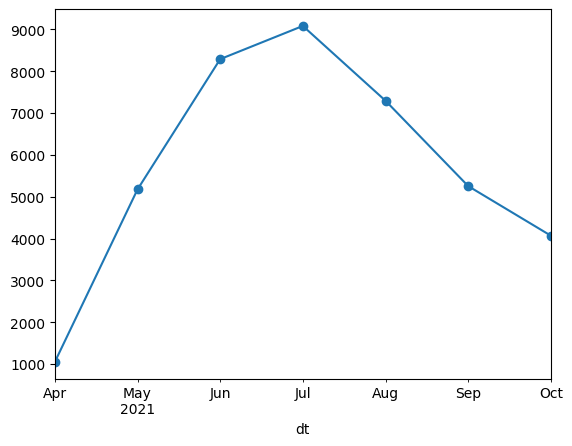

In [41]:
print(df_master['dt'].groupby(pd.to_datetime(df_master['dt']).dt.to_period('M')).count())

df_master['dt'].groupby(pd.to_datetime(df_master['dt']).dt.to_period('M')).count().plot(x='count', marker='o')
plt.show()

In [55]:
df_master[(df_master["dt"] > "2021-05-31") & (df_master["dt"] < "2021-07-01")]

,customer_id,current_dt,tgt_xsell_cust_voice_to_fixed,dmgrphc_b_age_bucket_txt,dmgrphc_b_zip_code_cd,dmgrphc_b_gender_typ,dmgrphc_b_city_txt,dmgrphc_b_country_txt,dmgrphc_b_no_of_dependents_val,dmgrphc_b_habits_desc_txt,...,cust_prd_hld_d_mobilevoicesubscription_closed_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_tvchannelpackage_active_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_vas_closed_0_to_30_over_30_to_60_days_avg_val,rev_m_bill_shock_eom_total_bill_amt_0m_to_avg_01m_flg,rev_m_bill_shock_eom_total_bill_amt_1m_to_avg_12m_flg,rev_m_eom_total_bill_amt_m0_val,rev_m_eom_total_bill_amt_m1_val,rev_m_eom_total_bill_amt_m2_val,partition_0,dt
37967,100879,2021-06-01,<NA>,46,77,U,Lake Ricardoton,Taiwan,4,Bad,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed,2021-06-01
2966,100733,2021-06-01,<NA>,42,0,U,Medinafurt,Guinea-Bissau,1,Good,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed,2021-06-01
36173,100463,2021-06-01,<NA>,32,23,U,South Kellyland,Liberia,4,Bad,...,NaN,1.000000,NaN,0,0,268.582890,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-01
4489,100790,2021-06-01,<NA>,36,56,F,Tiffanyland,Micronesia,0,Bad,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed,2021-06-01
25605,100418,2021-06-01,<NA>,49,40,F,Lake Garyfort,Uganda,4,Good,...,NaN,1.000000,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed,2021-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,100795,2021-06-30,<NA>,66,82,M,Sotoside,Turkey,2,Good,...,NaN,NaN,NaN,0,0,209.971973,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
22196,100193,2021-06-30,<NA>,30,72,M,Lake Matthew,Mauritania,2,Good,...,NaN,NaN,NaN,0,0,250.270683,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
24048,100837,2021-06-30,<NA>,21,71,M,Jackchester,Reunion,0,Good,...,15.5,NaN,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
20663,100991,2021-06-30,<NA>,66,16,U,Port Christinebury,United States Virgin Islands,4,Bad,...,NaN,1.319149,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30


In [57]:
df_master[(df_master["dt"] == "2021-06-30")]

,customer_id,current_dt,tgt_xsell_cust_voice_to_fixed,dmgrphc_b_age_bucket_txt,dmgrphc_b_zip_code_cd,dmgrphc_b_gender_typ,dmgrphc_b_city_txt,dmgrphc_b_country_txt,dmgrphc_b_no_of_dependents_val,dmgrphc_b_habits_desc_txt,...,cust_prd_hld_d_mobilevoicesubscription_closed_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_tvchannelpackage_active_0_to_30_over_30_to_60_days_avg_val,cust_prd_hld_d_vas_closed_0_to_30_over_30_to_60_days_avg_val,rev_m_bill_shock_eom_total_bill_amt_0m_to_avg_01m_flg,rev_m_bill_shock_eom_total_bill_amt_1m_to_avg_12m_flg,rev_m_eom_total_bill_amt_m0_val,rev_m_eom_total_bill_amt_m1_val,rev_m_eom_total_bill_amt_m2_val,partition_0,dt
14870,100676,2021-06-30,<NA>,53,91,M,North Jane,Palestinian Territory,3,Bad,...,NaN,NaN,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
32586,100508,2021-06-30,<NA>,39,85,U,Heatherhaven,Saint Pierre and Miquelon,0,Good,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed,2021-06-30
26425,100256,2021-06-30,<NA>,59,91,U,Raymondbury,Haiti,3,Bad,...,NaN,1.589744,NaN,<NA>,<NA>,NaN,NaN,NaN,xsell_cust_voice_to_fixed,2021-06-30
29863,100638,2021-06-30,0,21,21,M,East Brandonport,Grenada,2,Bad,...,NaN,1.000000,NaN,0,0,154.845189,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
27298,100284,2021-06-30,<NA>,34,28,F,East Nicoleberg,Nauru,2,Bad,...,NaN,1.000000,NaN,0,0,95.451865,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,100795,2021-06-30,<NA>,66,82,M,Sotoside,Turkey,2,Good,...,NaN,NaN,NaN,0,0,209.971973,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
22196,100193,2021-06-30,<NA>,30,72,M,Lake Matthew,Mauritania,2,Good,...,NaN,NaN,NaN,0,0,250.270683,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
24048,100837,2021-06-30,<NA>,21,71,M,Jackchester,Reunion,0,Good,...,15.5,NaN,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
20663,100991,2021-06-30,<NA>,66,16,U,Port Christinebury,United States Virgin Islands,4,Bad,...,NaN,1.319149,NaN,0,0,0.000000,0.0,0.0,xsell_cust_voice_to_fixed,2021-06-30
